In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('Country-data.csv')

print(df.head())
print(df.info())

features = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-nul

# Plotting the histograms for each feature 

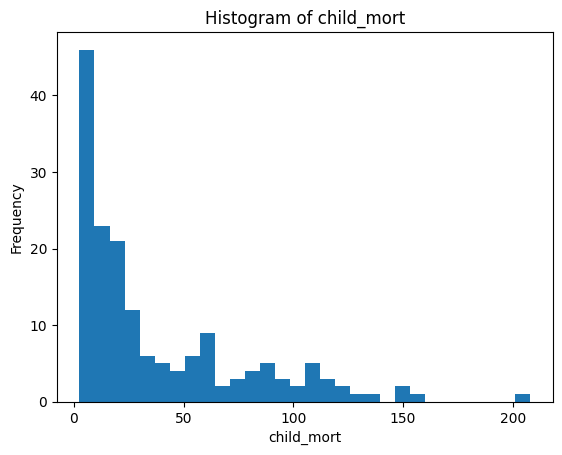

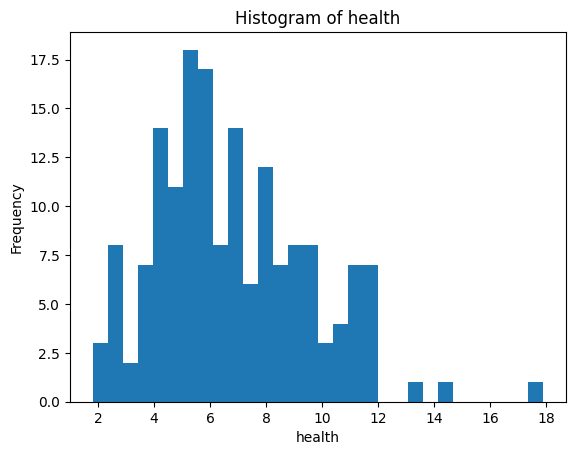

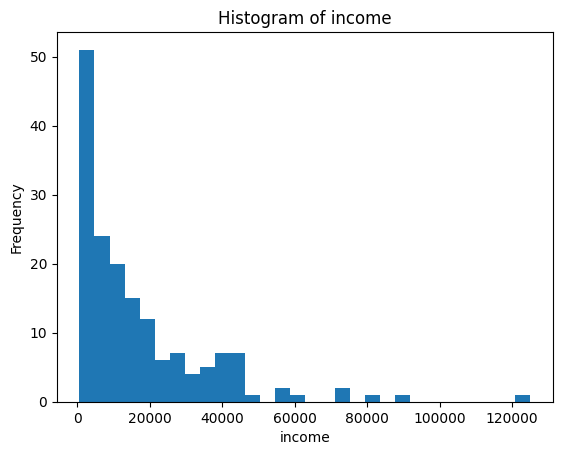

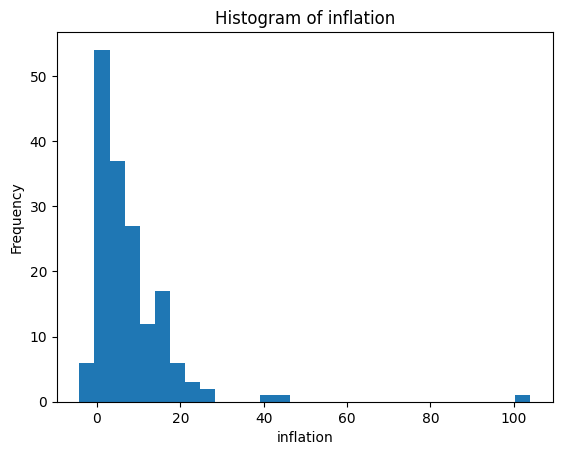

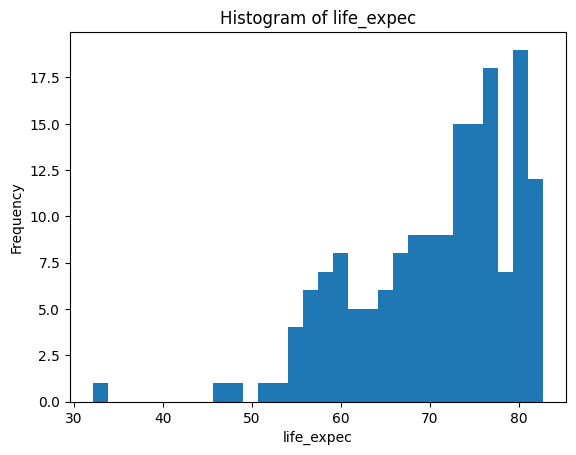

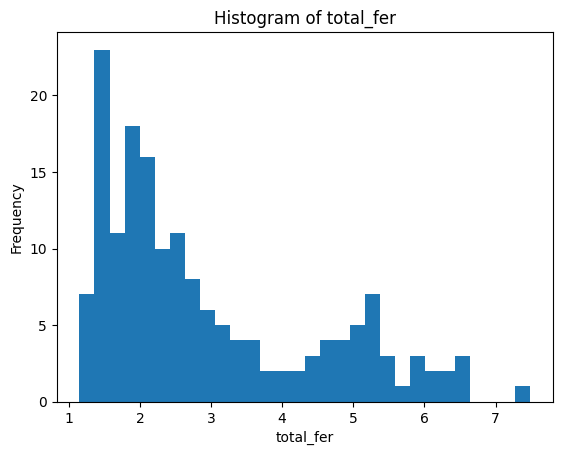

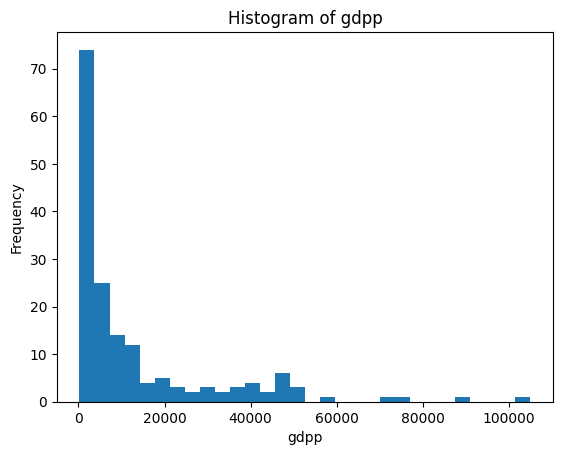

In [4]:
for feature in features:
    plt.figure()
    plt.hist(df[feature].dropna(), bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [5]:
df_scaled = df.copy()
for feature in features:
    df_scaled[feature] = (df_scaled[feature] - df_scaled[feature].mean()) / df_scaled[feature].std()

# K- means clustering implementation 

In [14]:
def initialize_centroids(data, k):
    """Randomly pick k distinct points as initial centroids."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]


def assign_clusters(data, centroids):
    """Assign each point to the nearest centroid (Euclidean distance)."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


def update_centroids(data, labels, k):
    """Recompute centroids as the mean of assigned points."""
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])


def compute_inertia(data, labels, centroids):
    """Sum of squared distances of points to their cluster centroids."""
    inertia = 0
    for i in range(centroids.shape[0]):
        cluster_points = data[labels == i]
        inertia += ((cluster_points - centroids[i])**2).sum()
    return inertia


def kmeans(data, k, max_iters=100, tol=1e-4):
    """Run K-means until convergence or max iterations."""
    centroids = initialize_centroids(data, k)
    for it in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        if np.all(shifts <= tol):
            print(f'Converged in {it+1} iterations')
            break
        centroids = new_centroids
    inertia = compute_inertia(data, labels, centroids)
    return centroids, labels, inertia

Converged in 8 iterations
Run 1: inertia = 475.44
Converged in 8 iterations
Run 2: inertia = 475.27
Converged in 6 iterations
Run 3: inertia = 475.44
Converged in 9 iterations
Run 4: inertia = 463.69
Converged in 11 iterations
Run 5: inertia = 466.48
Best inertia: 463.69


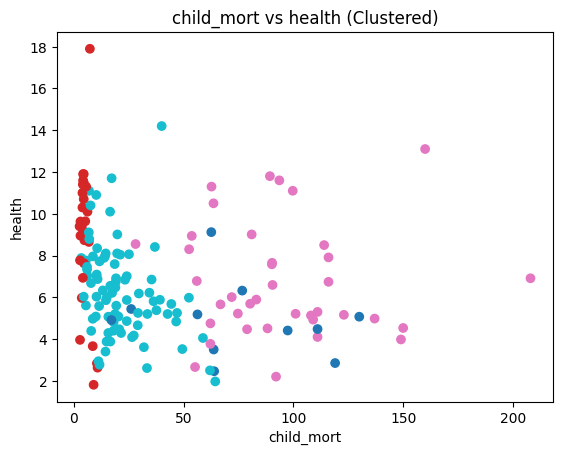

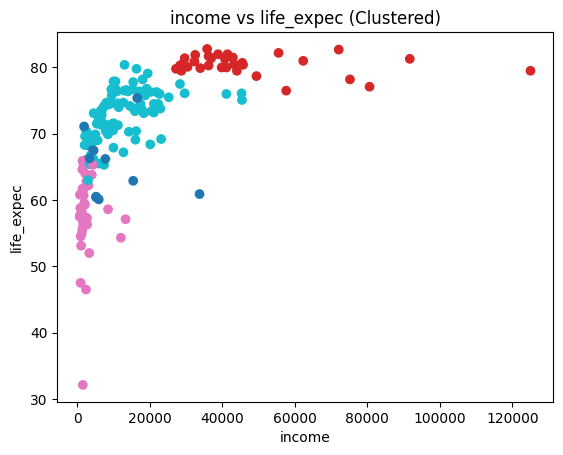

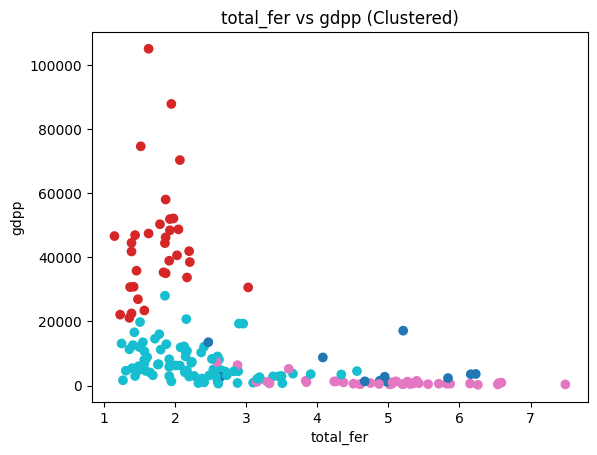

In [15]:
data_array = df_scaled[features].values
results = []
for i in range(5):
    centroids, labels, inertia = kmeans(data_array, k=4)
    print(f'Run {i+1}: inertia = {inertia:.2f}')
    results.append((centroids, labels, inertia))

best_centroids, best_labels, best_inertia = min(results, key=lambda x: x[2])
print(f'Best inertia: {best_inertia:.2f}')

pairs = [
    ('child_mort', 'health'),
    ('income', 'life_expec'),
    ('total_fer', 'gdpp')
]
for x_feat, y_feat in pairs:
    plt.figure()
    plt.scatter(df[x_feat], df[y_feat], c=best_labels, cmap='tab10')
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f'{x_feat} vs {y_feat} (Clustered)')
    plt.show()

In [7]:
if 'best_labels' not in globals():
    data_array = df_scaled[features].values
    temp_results = []
    for i in range(5):
        centroids, labels, inertia = kmeans(data_array, k=4)
        temp_results.append((centroids, labels, inertia))
    best_centroids, best_labels, best_inertia = min(temp_results, key=lambda x: x[2])

cluster_counts = {i: int((best_labels == i).sum()) for i in range(4)}
cluster_averages = pd.DataFrame(
    {i: df.loc[best_labels == i, features].mean() for i in range(4)}
).T

print("Cluster Sizes:", cluster_counts)
print("\nCluster Average Values:")
print(cluster_averages)

Converged in 11 iterations
Converged in 6 iterations
Converged in 11 iterations
Converged in 5 iterations
Converged in 8 iterations
Cluster Sizes: {0: 47, 1: 32, 2: 3, 3: 85}

Cluster Average Values:
   child_mort    health        income  inflation  life_expec  total_fer  \
0   90.793617  6.462553   3870.702128   9.951809   59.212766   4.974043   
1    4.903125  9.015937  47475.000000   2.703437   80.484375   1.774063   
2   57.733333  5.140000   9786.666667  63.033333   67.366667   3.650000   
3   21.102353  6.241765  13325.647059   6.543776   73.202353   2.244824   

           gdpp  
0   1900.255319  
1  45331.250000  
2   6160.000000  
3   7136.729412  
